# BPhO Computational Challenge
By **Xuancheng Lin** (Concord College)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h0 = 0.0
T0 = 273 + 15
P0 = 101325

R = 8.314 # Jmol/K
g = 9.8076 # N/kg
Md = 0.02896 # kg/mol
Mv = 0.01802 # kg/mol
cpd = 1003.5 # J/kg/J
Rsd = 287 # J/kg/K
Rsw = 461.5 # J/kg/K
dHv = 2501000 # J/kg

In [3]:
plt.rcParams['font.size'] = 12

## Task 1
Plot temperature vs altitude for the International Standard Atmosphere (ISA) model.

In [10]:
df = pd.DataFrame(data=
            [[0.0, -6.5],
            [11.0, 0.0],
            [20.0, 1.0],
            [32.0, 2.8],
            [47.0, 0.0],
            [51.0, -2.8],
            [71.0, -2.0]],
            columns=['Base h (km)', 'Lapse rate L (K/km)'],
            index=['Troposphere', 
                   'Tropopause',
                   'Stratosphere', 
                   'Stratosphere',
                   'Stratopause', 
                   'Mesosphere', 
                   'Mesosphere'])
df

,Base h (km),Lapse rate L (K/km)
Troposphere,0.0,-6.5
Tropopause,11.0,0.0
Stratosphere,20.0,1.0
Stratosphere,32.0,2.8
Stratopause,47.0,0.0
Mesosphere,51.0,-2.8
Mesosphere,71.0,-2.0


In [11]:
df.to_latex()

'\\begin{tabular}{lrr}\n\\toprule\n{} &  Base h (km) &  Lapse rate L (K/km) \\\\\n\\midrule\nTroposphere  &          0.0 &                 -6.5 \\\\\nTropopause   &         11.0 &                  0.0 \\\\\nStratosphere &         20.0 &                  1.0 \\\\\nStratosphere &         32.0 &                  2.8 \\\\\nStratopause  &         47.0 &                  0.0 \\\\\nMesosphere   &         51.0 &                 -2.8 \\\\\nMesosphere   &         71.0 &                 -2.0 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [12]:
delta_h = df.iloc[1:7, 0].to_numpy() - df.iloc[0:6, 0].to_numpy()
delta_h

array([11.,  9., 12., 15.,  4., 20.])

In [13]:
delta_T = delta_h * df.iloc[0:6, 1].to_numpy()
delta_T = np.insert(delta_T, 0, 0.0)
delta_h = np.insert(delta_h, 0, 0.0)
delta_T

array([  0. , -71.5,   0. ,  12. ,  42. ,   0. , -56. ])

In [14]:
T = T0 + delta_T.cumsum()
df['Temperature (K)'] = T
df

,Base h (km),Lapse rate L (K/km),Temperature (K)
Troposphere,0.0,-6.5,288.0
Tropopause,11.0,0.0,216.5
Stratosphere,20.0,1.0,216.5
Stratosphere,32.0,2.8,228.5
Stratopause,47.0,0.0,270.5
Mesosphere,51.0,-2.8,270.5
Mesosphere,71.0,-2.0,214.5


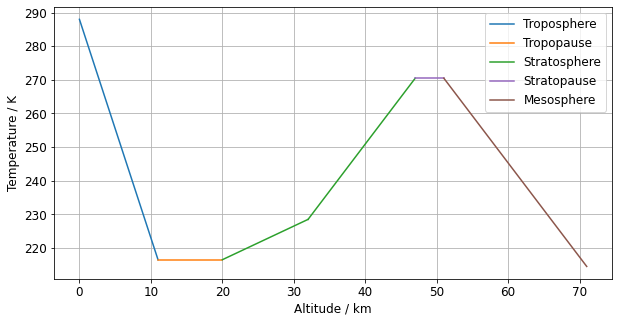

In [15]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.ylabel('Temperature / K')
plt.xlabel('Altitude / km')

for i, h in enumerate(df.iloc[:, 1]):
    color_ = 'C'+str(i) if df.index[i] != df.index[i-1] else 'C'+str(i-1)
    label_ = df.index[i] if df.index[i] != df.index[i-1] else None
    plt.plot(df.iloc[i:i+2, 0], df.iloc[i:i+2, 2], label=label_, color=color_)

plt.legend()

## Task 2
Plot pressure vs altitude for the ISA model for dry air.

### Isothermal layer, L = 0

In [16]:
def P(h, h0, P0, T0):
    return P0*np.exp((-(Md*g)/(R*T0))*(h-h0))

In [17]:
df['Pressure (Pa)'] = P(df.iloc[:, 0]*1000, h0, P0, T0)
df

,Base h (km),Lapse rate L (K/km),Temperature (K),Pressure (Pa)
Troposphere,0.0,-6.5,288.0,101325.000000
Tropopause,11.0,0.0,216.5,27481.431104
Stratosphere,20.0,1.0,216.5,9449.184046
Stratosphere,32.0,2.8,228.5,2276.150243
Stratopause,47.0,0.0,270.5,384.113169
Mesosphere,51.0,-2.8,270.5,238.998258
Mesosphere,71.0,-2.0,214.5,22.288068


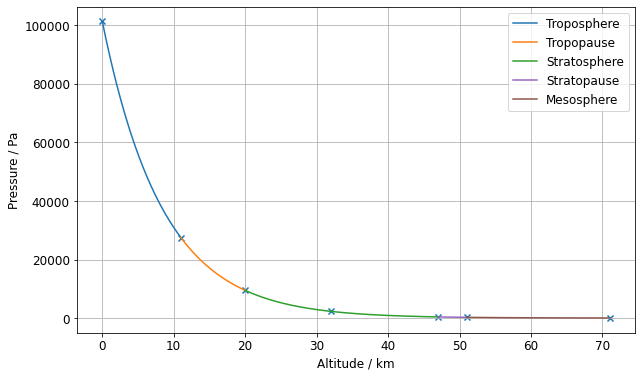

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.grid(True)
ax.set_ylabel('Pressure / Pa')
ax.set_xlabel('Altitude / km')
# ax[1].grid(True)
# ax[1].set_ylabel('ln(Pressure / Pa)')
# ax[1].set_xlabel('Altitude / km')


for i, h in enumerate(df.iloc[1:, 0]):
    plot_h = np.linspace(df.iloc[i, 0], h, 150)
    plot_P = P(plot_h*1000, h0, P0, T0)
#     ln_plot_P = np.log(plot_P)
    
    color_ = 'C'+str(i) if df.index[i] != df.index[i-1] else 'C'+str(i-1)
    label_ = df.index[i] if df.index[i] != df.index[i-1] else None
    
    ax.plot(plot_h, plot_P, label=label_, color=color_)
#     ax[1].plot(plot_h, ln_plot_P, label=label_, color=color_)

ax.legend()
# ax[1].legend()

ax.scatter(df.iloc[:, 0], df.iloc[:, 3], marker='x')
# ax[1].scatter(df.iloc[:, 0], np.log(df.iloc[:, 3]), marker='x')

### Constant, L != 0

In [51]:
def P_L(L, h, h0, P0, T0):
    return P0*(1-L*(h-h0)/T0)**(Md*g/L/R)

In [64]:
L = 0.003

In [65]:
df['Pressure_L (Pa)'] = P_L(L, df.iloc[:, 0]*1000, h0, P0, T0)
df

,Base h (km),Lapse rate L (K/km),Temperature (K),Pressure (Pa),Pressure_L (Pa)
Troposphere,0.0,-6.5,288.0,101325.000000,101325.000000
Tropopause,11.0,0.0,216.5,27481.431104,25343.039080
Stratosphere,20.0,1.0,216.5,9449.184046,7085.383665
Stratosphere,32.0,2.8,228.5,2276.150243,1001.082429
Stratopause,47.0,0.0,270.5,384.113169,47.829767
Mesosphere,51.0,-2.8,270.5,238.998258,18.136201
Mesosphere,71.0,-2.0,214.5,22.288068,0.022471


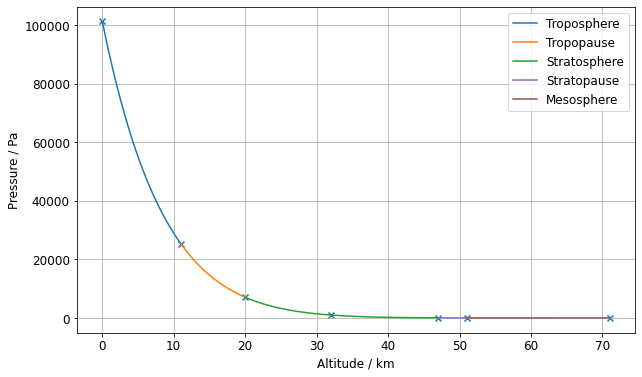

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.grid(True)
ax.set_ylabel('Pressure / Pa')
ax.set_xlabel('Altitude / km')
# ax[1].grid(True)
# ax[1].set_ylabel('ln(Pressure / Pa)')
# ax[1].set_xlabel('Altitude / km')

for i, h in enumerate(df.iloc[1:, 0]):
    plot_h = np.linspace(df.iloc[i, 0], h, 150)
    plot_P = P_L(L, plot_h*1000, h0, P0, T0)
#     ln_plot_P = np.log(plot_P)
    
    color_ = 'C'+str(i) if df.index[i] != df.index[i-1] else 'C'+str(i-1)
    label_ = df.index[i] if df.index[i] != df.index[i-1] else None
    
    ax.plot(plot_h, plot_P, label=label_, color=color_)
#     ax[1].plot(plot_h, ln_plot_P, label=label_, color=color_)

ax.legend()
ax.scatter(df.iloc[:, 0], df.iloc[:, 4], marker='x')
# ax[1].scatter(df.iloc[:, 0], np.log(df.iloc[:, 4]), marker='x')

## Task 3

### Water vapour pressure

In [35]:
def Es(Tc): # Celcius -> mbar
    return 6.1121*np.exp((18.678-Tc/234.5)*(Tc/(Tc+257.14)))

In [36]:
U = 0.5

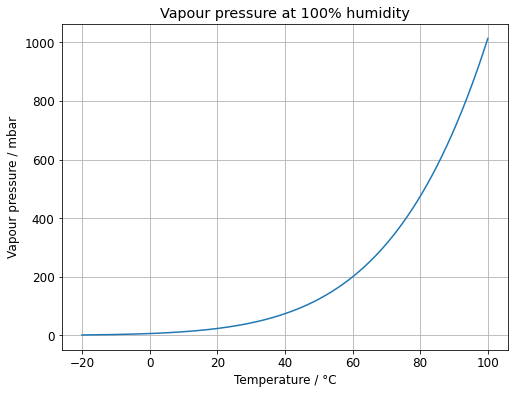

In [37]:
T = np.linspace(-20, 100, 1000)
plt.figure(figsize=(8, 6))
plt.title('Vapour pressure at 100% humidity')
plt.xlabel('Temperature / °C')
plt.ylabel('Vapour pressure / mbar')
plt.grid(True)
plt.plot(T, Es(T))

### Numerical method

In [38]:
def delta_P(dh, P, U, T):
    return -Md*g*dh/R/T*(P-U*(1-Mv/Md)*Es(T-273))

In [39]:
def r(T, P, U):
    return (Rsd/Rsw)*U*Es(T-273)/(P-U*Es(T-273))

In [40]:
def L(r, T):
    return g*(1+r*dHv/Rsd/T)/(cpd+(dHv**2)*r/(Rsw*T**2))

In [66]:
def Tboil(P):
    return (1/Ts-(R/dH*np.log(P/Ps)))**-1

In [67]:
def Tdew(T, U):
    if U > 0:
        Tc = T-273
        a = 17.625
        b = 243.04
        return b*(np.log(U)+(a*Tc/(b+Tc)))/(a-np.log(U)-a*Tc/(b+Tc))

In [80]:
U_List = [0, 0.25, 0.5, 0.75, 1]
P0 = 1013.25
T0 = 15+273
dh = 100 # metres
h = np.linspace(0, 12, 121)
Ts = 100+273
Ps = 1013.25
dH = 40700

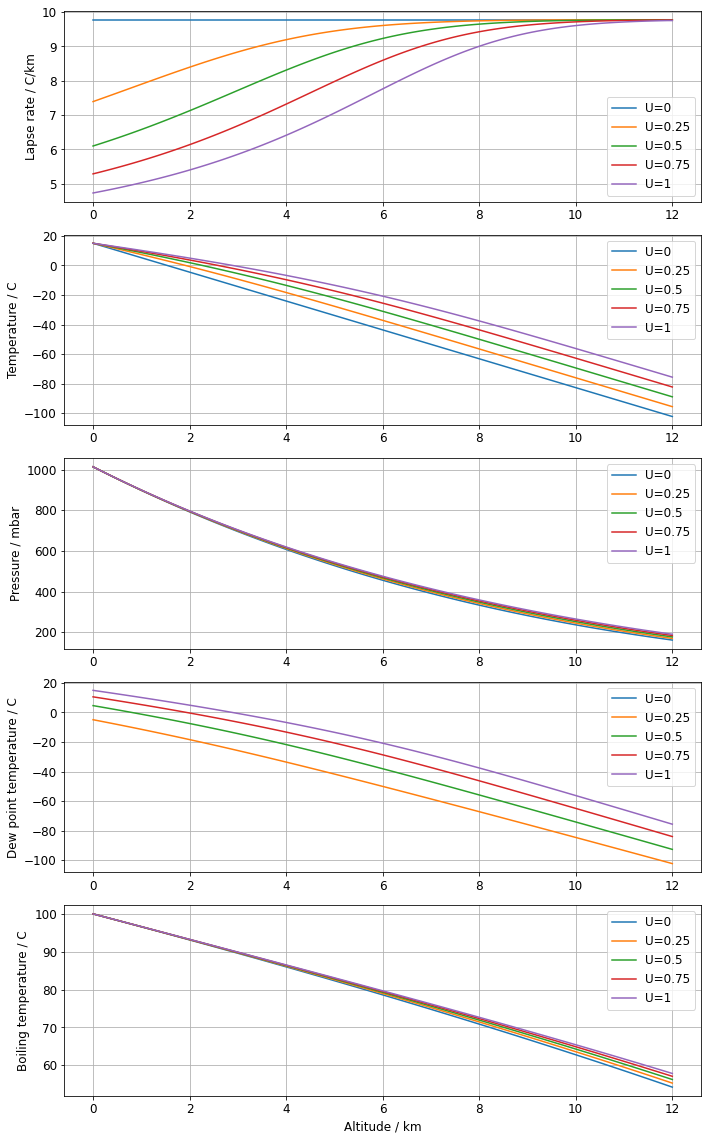

In [111]:
fig, axs = plt.subplots(5, 1, figsize=(10, 16))
fig.subplots_adjust(hspace = 0.3)

for U in U_List:
    P_ = P0
    T_ = T0
    P_List = []
    L_List = []
    T_List = []
    Tboil_List = []
    Tdew_List = []

    for _ in range(120):
        dP = delta_P(dh, P_, U, T_)
        r_ = r(T_, P_, U)
        L_ = L(r_, T_)
        P_List.append(P_)
        L_List.append(L_*1000)
        T_List.append(T_-273)
        Tboil_List.append(Tb(P_)-273)
        Tdew_List.append(Td(T_, U))
        
        P_ += dP
        T_ -= L_*dh
        
    P_List.append(P_)
    L_List.append(L_*1000)
    T_List.append(T_-273)
    Tboil_List.append(Tboil(P_)-273)
    Tdew_List.append(Tdew(T_, U))
    
    axs[0].plot(h, L_List, label='U='+str(U))
    axs[1].plot(h, T_List, label='U='+str(U))
    axs[2].plot(h, P_List, label='U='+str(U))
    axs[3].plot(h, Tdew_List, label='U='+str(U))
    axs[4].plot(h, Tboil_List, label='U='+str(U))

axs[0].set_ylabel('Lapse rate / C/km')
axs[1].set_ylabel('Temperature / C')
axs[2].set_ylabel('Pressure / mbar')
axs[3].set_ylabel('Dew point temperature / C')
axs[4].set_ylabel('Boiling temperature / C')
axs[-1].set_xlabel('Altitude / km')

for ax in axs:
    ax.grid(True)
    ax.legend()

### Pressure vs Boiling point of water

In [240]:
Lvap_min = 42.7 - 0.8
Lvap_max = 42.7 + 0.8
Lvap = 43.8 # KJ/mol
p100 = 101.325
T100 = 373

In [241]:
def P_boil(T, L):
    return p100*np.exp(L/R/T100)*np.exp(-L/R/T)

In [242]:
plot_T = np.linspace(40+273, 100+273, 1000)
plot_P = P_boil(plot_T, Lvap*1000)

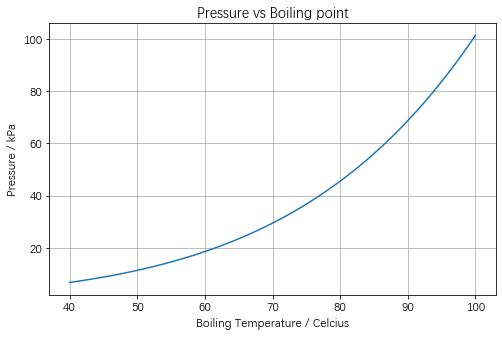

In [243]:
plt.figure(figsize=(8, 5))
plt.xlabel('Boiling Temperature / Celcius')
plt.ylabel('Pressure / kPa')
plt.title('Pressure vs Boiling point')
plt.grid(True)
plt.plot(plot_T-273, plot_P)

## Graphical User Interface

In [62]:
import numpy as np
import matplotlib
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

from tkinter import *

import webbrowser


class VerticalNavigationToolbar2Tk(NavigationToolbar2Tk):
    def __init__(self, canvas, window):
        super().__init__(canvas, window, pack_toolbar=False)

    def _Button(self, text, image_file, toggle, command):
        b = super()._Button(text, image_file, toggle, command)
        b.pack(side=TOP)
        return b

    def _Spacer(self):
        s = Frame(self, width=26, relief=RIDGE, bg="DarkGray", padx=2)
        s.pack(side=TOP, pady=5)  # pack in vertical direction
        return s

    def set_message(self, s):
        pass


class GUI(object):
    R = 8.314  # Jmol/K
    g = 9.8076  # N/kg
    Md = 0.02896  # kg/mol
    Mv = 0.01802  # kg/mol
    cpd = 1003.5  # J/kg/J
    Rsd = 287  # J/kg/K
    Rsw = 461.5  # J/kg/K
    dHv = 2501000  # J/kg
    Ts = 100+273
    Ps = 1013.25
    dH = 40700

    SAVE_PATH = './saves/'

    font = {'size': 20}

    matplotlib.rc('font', **font)
    matplotlib.rcParams["figure.autolayout"] = True

    def __init__(self, device='cuda'):
        self.device = device

        self.root = Tk()
        self.root.geometry('1400x740')
        self.root.title('Demo')

        self.warn_label = Label(self.root, text='This is a free open-source project by (Xuancheng Lin)')
        self.warn_label.place(x=50, y=670)

        self.github = Label(self.root, text='My Github Page', fg='blue', cursor='hand2')
        self.github.place(x=50, y=690)
        self.github.bind('<Button-1>', lambda x: self.open_url('https://github.com/CytrusL'))

        self.canvas_setup()
        self.toolbar = VerticalNavigationToolbar2Tk(self.canvas, self.root)
        self.toolbar.place(x=1400, y=50, anchor=NE)

        self.frame = LabelFrame(self.root, text='Parameters', width=450, height=600)
        self.frame.place(x=50, y=50)

        # self.save_s_button = Button(self.frame, text='Save', command=self.save)
        # self.save_s_button.place(x=40, y=500, width=150, height=50)

        self.T0_Label = Label(self.frame, text='Initial Temperature (C)')
        self.T0_Label.place(x=40, y=40)
        self.T0_var = StringVar()
        self.T0_var.set(15)
        self.T0_Entry = Entry(self.frame, width=8, textvariable=self.T0_var)
        self.T0_Entry.bind('<Return>', self.retDrawC)
        self.T0_Entry.place(x=190, y=40)

        self.P0_Label = Label(self.frame, text='Initial Pressure (mbar)')
        self.P0_Label.place(x=40, y=80)
        self.P0_var = StringVar()
        self.P0_var.set(1013.25)
        self.P0_Entry = Entry(self.frame, width=8, textvariable=self.P0_var)
        self.P0_Entry.bind('<Return>', self.retDrawC)
        self.P0_Entry.place(x=190, y=80)

        self.H_Label = Label(self.frame, text='Maximum Altitude (km)')
        self.H_Label.place(x=40, y=120)
        self.H_Scroll = Scale(self.frame, from_=5, to=17, orient=HORIZONTAL, command=self.scrollDrawC)
        self.H_Scroll.set(12)
        self.H_Scroll.place(x=190, y=100)

        self.U_Label = Label(self.frame, text='Humidity:')
        self.U_Label.place(x=40, y=170)
        self.U_var = StringVar()
        self.U_var.set(0.50)
        self.U_Entry = Entry(self.frame, width=5, textvariable=self.U_var)
        self.U_Entry.bind('<Return>', self.retDraw)
        self.U_Entry.place(x=230, y=170)
        self.U_Scroll = Scale(self.frame, from_=0, to=1, resolution=0.01, orient=HORIZONTAL, command=self.scrollDraw)
        self.U_Scroll.set(0.5)
        self.U_Scroll.place(x=120, y=150)

        self.Hx_Label = Label(self.frame, text='Altitude (km)')
        self.Hx_Label.place(x=40, y=300)
        self.Hx_var = StringVar()
        self.Hx_var.set(0)
        self.Hx_Entry = Entry(self.frame, width=8, textvariable=self.Hx_var)
        self.Hx_Entry.bind('<Return>', self.calc_value)
        self.Hx_Entry.place(x=190, y=300)

        self.L_Label = Label(self.frame, text='Lapse Rate (C/km)')
        self.L_Label.place(x=40, y=340)
        self.L_var = StringVar()
        self.L_valLabel = Label(self.frame, textvariable=self.L_var)
        self.L_valLabel.place(x=190, y=340)

        self.T_Label = Label(self.frame, text='Temperature (C)')
        self.T_Label.place(x=40, y=370)
        self.T_var = StringVar()
        self.T_valLabel = Label(self.frame, textvariable=self.T_var)
        self.T_valLabel.place(x=190, y=370)

        self.P_Label = Label(self.frame, text='Pressure (mbar)')
        self.P_Label.place(x=40, y=400)
        self.P_var = StringVar()
        self.P_valLabel = Label(self.frame, textvariable=self.P_var)
        self.P_valLabel.place(x=190, y=400)

        self.D_Label = Label(self.frame, text='Dew point temp (C)')
        self.D_Label.place(x=40, y=430)
        self.D_var = StringVar()
        self.D_valLabel = Label(self.frame, textvariable=self.D_var)
        self.D_valLabel.place(x=190, y=430)

        self.clear_var = IntVar()
        self.clear_button = Checkbutton(self.frame, text='Clear', variable=self.clear_var)
        self.clear_button.place(x=40, y=210, width=50, height=40)

        self.draw(0.5)

        self.calc_lim()
        self.calc_value(0)

        self.root.mainloop()

    def canvas_setup(self):
        self.figure = Figure(figsize=(16, 12), dpi=50)
        self.ax1 = self.figure.add_subplot(221)
        self.ax2 = self.figure.add_subplot(222)
        self.ax3 = self.figure.add_subplot(223)
        self.ax4 = self.figure.add_subplot(224)

        self.canvas = FigureCanvasTkAgg(self.figure, master=self.root)
        self.canvas.get_tk_widget().place(x=550, y=50)

        self.axs = [self.ax1, self.ax2, self.ax3, self.ax4]

    def calc_value(self, var):
        h = float(self.Hx_var.get())
        i = int(h / 0.1)
        self.L_var.set(self.L_List[i].round(2))
        self.T_var.set(self.T_List[i].round(2))
        self.P_var.set(self.P_List[i].round(2))
        if self.Td_List[i]:
            self.D_var.set(self.Td_List[i].round(2))
        else:
            self.D_var.set('nan')

    def retDraw(self, var):
        self.draw(float(self.U_var.get()))
        self.U_Scroll.set(float(self.U_var.get()))

    def retDrawC(self, var):
        self.clear()
        self.calc_lim()
        self.draw(float(self.U_var.get()))

    def scrollDraw(self, var):
        self.draw(float(self.U_Scroll.get()))
        self.U_var.set(self.U_Scroll.get())

    def scrollDrawC(self, var):
        self.clear()
        self.calc_lim()
        self.draw(float(self.U_Scroll.get()))

    def clear(self):
        for ax in self.axs:
            ax.cla()

    def calc_lim(self):
        P0 = float(self.P0_var.get())
        T0 = float(self.T0_var.get()) + 273
        P_ = P0
        T_ = T0
        r0 = self.r(T0, P0, 0)
        r1 = self.r(T0, P0, 1)
        L0 = self.L(r0, T0)
        L1 = self.L(r1, T0)

        hMax = int(self.H_Scroll.get())
        dh = 100
        n = int(hMax / 0.1) + 1

        U = 0.0001
        for _ in range(n):
            dP = self.delta_P(dh, P_, U, T_)
            r_ = self.r(T_, P_, U)
            L_ = self.L(r_, T_)
            P_ += dP
            T_ -= L_ * dh
            Td_ = self.Td(T_, U)

        self.ax1.set_ylim(int(L1 * 1000), int(L0 * 1000) + 1)
        self.ax2.set_ylim(int(T_) - 273 - 1, int(float(self.T0_var.get())) + 5)
        self.ax3.set_ylim(0, int(float(self.P0_var.get())))
        self.ax4.set_ylim(int(Td_), int(float(self.T0_var.get())) + 5)

    def draw(self, var):
        P0 = float(self.P0_var.get())
        T0 = float(self.T0_var.get()) + 273
        P_ = P0
        T_ = T0
        U = float(var)
        self.P_List = []
        self.L_List = []
        self.T_List = []
        self.Td_List = []
#         self.Tb_List = []

        hMax = int(self.H_Scroll.get())
        dh = 100
        n = int(hMax / 0.1) + 1
        h = np.linspace(0, hMax, n)

        if self.clear_var.get():
            self.clear()
            self.calc_lim()

        for _ in range(n):
            dP = self.delta_P(dh, P_, U, T_)
            r_ = self.r(T_, P_, U)
            L_ = self.L(r_, T_)
            P_ += dP
            T_ -= L_ * dh
            self.P_List.append(P_)
            self.L_List.append(L_ * 1000)
            self.T_List.append(T_ - 273)
            self.Td_List.append(self.Td(T_, U))
#             self.Tb_List.append(self.Tb(P_))

        self.ax1.plot(h, self.L_List)
        self.ax2.plot(h, self.T_List)
        self.ax3.plot(h, self.P_List)
        self.ax4.plot(h, self.Td_List)

        self.ax1.set_ylabel('Lapse rate / C/km')
        self.ax2.set_ylabel('Temperature / C')
        self.ax3.set_ylabel('Pressure / mbar')
        self.ax4.set_ylabel('Dew point temperature / C')

        for ax in self.axs:
            ax.grid(True)
            ax.set_xlabel('Altitude / km')
            ax.set_xlim(0, hMax)

        self.canvas.draw()

    def save(self):
        self.figure.savefig('./figures/figure.png')

    @staticmethod
    def Es(Tc):
        return 6.1121 * np.exp((18.678 - Tc / 234.5) * (Tc / (Tc + 257.14)))

    @staticmethod
    def Td(T, U):  # Dew point
        if U > 0:
            Tc = T - 273
            a = 17.625
            b = 243.04
            return b * (np.log(U) + (a * Tc / (b + Tc))) / (a - np.log(U) - a * Tc / (b + Tc))
        
    def Tb(self, P):
        return (1/self.Ts-(self.R/self.dH*np.log(P/self.Ps)))**-1003.5

    def delta_P(self, dh, P, U, T):
        return -self.Md * self.g * dh / self.R / T * (P - U * (1 - self.Mv / self.Md) * self.Es(T - 273))

    def r(self, T, P, U):
        return (self.Rsd / self.Rsw) * U * self.Es(T - 273) / (P - U * self.Es(T - 273))

    def L(self, r, T):
        return self.g * (1 + r * self.dHv / self.Rsd / T) / (self.cpd + (self.dHv ** 2) * r / (self.Rsw * T ** 2))

    def open_url(self, url):
        webbrowser.open_new(url)


if __name__ == '__main__':
    GUI()


## Comparison with the atmospheres of other planets

### Mars Atmosphere Model
$$\rho = density (kg/m^3)$$
$$ P = Pressure  (Pa) $$
$$ T = Temperature (^{\circ}C) $$
$$ h = Altitude (m) $$

The Martian atmosphere is an extremely thin sheet of gas, principally carbon dioxide (95%), that extends from the surface of Mars to the edge of space. The Martian atmosphere is less dense than the Earth's atmosphere (1% of Earth's), but there are many similarities. Gravity holds the atmosphere to the Martian surface and within the atmosphere, very complex chemical, thermodynamic, and fluid dynamics effects occur. The atmosphere is not uniform; fuild properties are constantly changing with time and place producing weather on Mars just like on Earth.
Variation in atmospheric properties extend upward from the surface of Mars. The Sun heats the surface and some of this heat goes into warming the gas  near the surface. The heated gas is then diffused or convected up through the atmosphere. Thus, the gas temperature is highest near the surface and decreases as the altitude increases. The speed of sound depends on the temperature and also decreases with increasing altitude. As with the Earth, the pressure in the atmosphere decreases with altitude. The density of the atmosphere depends on both temperature and the pressure trhough the equation of state and also decreases with increasing altitude.


The model has two zones with separate curve fits for the lower atmosphere and the upper atmosphere. The lower atmosphere runs from the surface of Mars to 7,000 meters. In the lower atmosphere, the temperature decreases linearly and the pressure decreases exponentially. The rate of temperature decrease is called the lapse rate. For the temperature T and the pressure p, the metric units curve fits for the lower atmosphere are:
> For $ h > 7000 $
$$ T = -23.4 - 0.00222h$$
$$ P = 0.699 * e^-0.0009h $$

where the temperature is given in Celsius degrees, the pressure in kilo-Pascals,and h is the altitude in meters. The upper stratosphere model is used for altitudes above 7,000 meters. In the upper atmosphere the temperature decreases linearly and the pressure decreases exponentially. The metric units curve fits for the upper atmosphere are:
> For $ h < 7000 $
$$ T = -31 - 0.000998h $$
$$ P = 0.699 * e^-0.0009h$$

In each zone the density r is derived from the equation of state.
> $$ \rho = {P \over{0.1921 \times (T + 273.1)}}$$

In [15]:
def Model_Mars(h): # in metres
    T = np.hstack((-31-0.000998*h[h <= 7000], -23.4-0.00222*(h[h > 7000])))
    P = 0.699*np.exp(-0.00009*h)*1000
    rho = P/(0.1921*(T+273.1))
    
    return T, P, rho

In [16]:
Model_Mars(np.array([7000, 7001]))[0]

array([-37.986  , -38.94222])

Text(0.5, 0, 'Height/m')

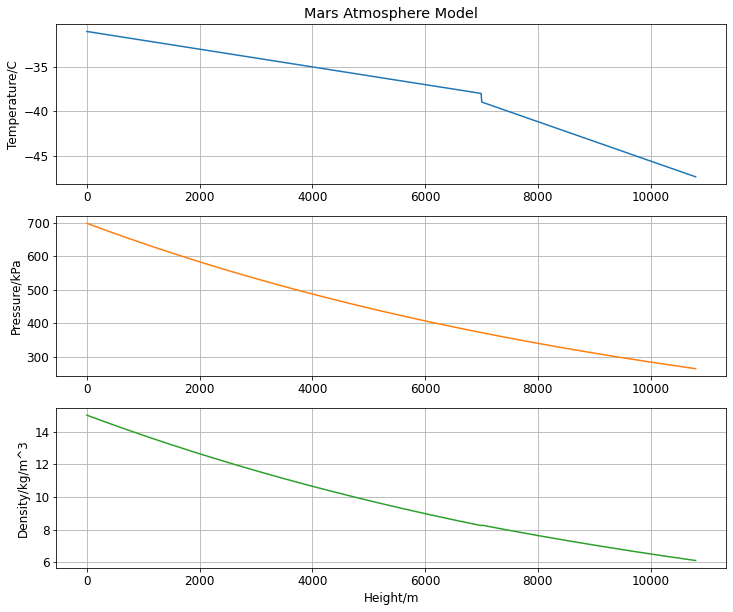

In [18]:
h = np.linspace(0, 10800, 1000)
fig, axs = plt.subplots(3, 1, figsize=(12, 10))
outputs = Model_Mars(h)
axs[0].set_title('Mars Atmosphere Model')
titles = ['Temperature/C', 'Pressure/kPa', 'Density/kg/m^3']

for i, ax in enumerate(axs):
    ax.plot(h, outputs[i], color='C'+str(i))
    ax.set_ylabel(titles[i])
    ax.grid()
axs[-1].set_xlabel('Height/m')

Reference:
https://www.grc.nasa.gov/www/k-12/rocket/atmosmrm.html

### Mercury Atmosphere composition
Mercury is the smallest of the eight planets. Its low surface gravity makes holding on to an atmosphere in the best of circumstances a challenge.
Mercury isn't ideally located for an atmosphere, because it is only few million miles from the Sun. The charged particles bombard Mercury, and the paritcles and the heat produced kick material up from the outer layer of the planet, sending it to the air. The heaviest atoms drift back to the surface, while the lightest are affected by gravity and by pressure from photons. Theresult is a tenuous atmosphere known as an exosphere.

### Venus Atmosphere Model

https://ntrs.nasa.gov/api/citations/19690011554/downloads/19690011554.pdf

In [4]:
dH = np.array([[39200, 70000-39221, 19999, 70477-50000, 100000-70478]])
dT = np.array([699-386.534, 386.527-314.2, 314.200-180, 314.194-228.686, 228.683-173.350])

In [5]:
L = dT/dH

In [82]:
L*1000

array([[7.97107143, 2.34988141, 6.71033552, 4.175807  , 1.87429713]])

In [74]:
print(dH)

[[39200 30779 19999 20477 29522]]


In [78]:
print(dT)

[312.466  72.327 134.2    85.508  55.333]


In [104]:
matplotlib.rcParams.update({'font.size': 12})

In [6]:
data = [[[0, 39200], [699.000, 386.534], [93219.00, 3001.63 ]], 
      [[39221, 50000], [386.527, 314.200], [3001.27, 729.81]], 
      [[50000, 70000], [314.200, 180.000], [729.81, 16.67]], 
      [[50001, 70477], [314.194, 228.686], [729.70, 20.99]],
      [[70478, 100000], [228.683, 173.350], [20.99, 0.01588]]]

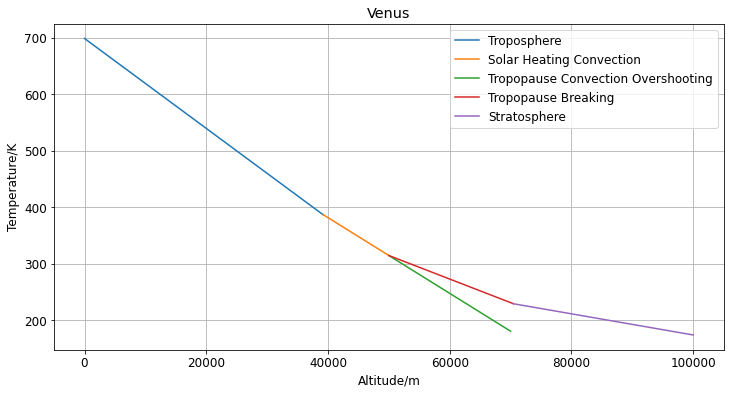

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
labels = ['Troposphere', 'Solar Heating Convection', 'Tropopause Convection Overshooting', 'Tropopause Breaking', 'Stratosphere']
labels2 = ['Altitude/m', 'Temperature/K', 'Pressure/hPa']

for i in range(5):
    ax.plot(data[i][0], data[i][1], label=labels[i])
#     ax[1].plot(data[i][0], data[i][2], label=labels[i])
#     ax[2].plot(data[i][2], data[i][1], label=labels[i])
ax.set_title('Venus')
ax.set_xlabel(labels2[0])
ax.set_ylabel(labels2[1])
plt.legend()
plt.grid()